<a href="https://colab.research.google.com/github/safaltasaxena/deep-learning-mini-projects/blob/main/Data-Augmentation/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA AUGMENTATION

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
#PIL is an image library in python
import tensorflow as tf
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
#get_file is a helper fnc from utils from which im saving this dataset in my current
#dir thus using '.' as from the name of flower_photos.untar is unzipping the tgz
#which is used for zip file

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
#it helps in performong several fnc required for data augemntaion
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
#for eg
image_count = len(list(data_dir.glob('**/*.jpg')))
image_count
#glob globally searches from pattern matching to search files or folders

3670

In [ ]:
roses = list(data_dir.glob('**/roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16903172207_2cd7aca66a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3742155164_14b557a51c_n.jpg')]

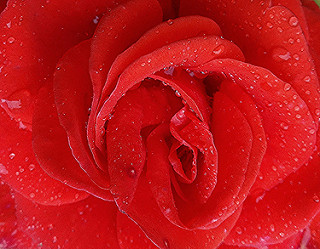

In [ ]:
PIL.Image.open(str(roses[1]))
#matshow is purely for displaying arrays as images.
#PIL (actually “Pillow”, its modern version) is used to open, process, and convert
#convert image files — e.g., .jpg, .png, etc.

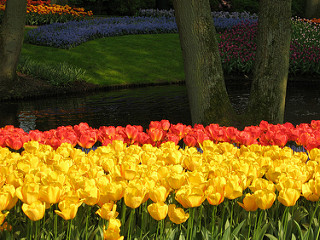

In [ ]:
tulips = list(data_dir.glob('**/tulips/*.jpg'))
PIL.Image.open(str(tulips[1]))

In [ ]:
flower_images_dict = {
    'roses': list(data_dir.glob('**/roses/*.jpg')),
    'daisy': list(data_dir.glob('**/daisy/*.jpg')),
    'dandelion': list(data_dir.glob('**/dandelion/*.jpg')),
    'sunflowers': list(data_dir.glob('**/sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('**/tulips/*.jpg')),
}
#creating a path dictionary

In [ ]:
flower_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
#creating a label dictionary

array([[[174, 199, 255],
        [176, 200, 254],
        [177, 202, 252],
        ...,
        [184, 188, 207],
        [205, 205, 223],
        [214, 213, 229]],

       [[174, 199, 255],
        [176, 200, 254],
        [177, 202, 252],
        ...,
        [206, 215, 229],
        [213, 222, 235],
        [215, 225, 235]],

       [[174, 200, 254],
        [177, 201, 255],
        [178, 203, 253],
        ...,
        [215, 221, 234],
        [212, 221, 231],
        [208, 219, 227]],

       ...,

       [[ 80, 175, 155],
        [ 77, 169, 150],
        [ 76, 169, 148],
        ...,
        [220, 221, 235],
        [220, 220, 236],
        [220, 220, 236]],

       [[ 87, 174, 160],
        [ 83, 168, 153],
        [ 85, 169, 151],
        ...,
        [220, 221, 235],
        [220, 221, 235],
        [220, 220, 236]],

       [[ 82, 173, 152],
        [ 80, 171, 150],
        [ 78, 167, 148],
        ...,
        [220, 220, 236],
        [220, 220, 238],
        [220, 220, 238]]], dtype=uint8)
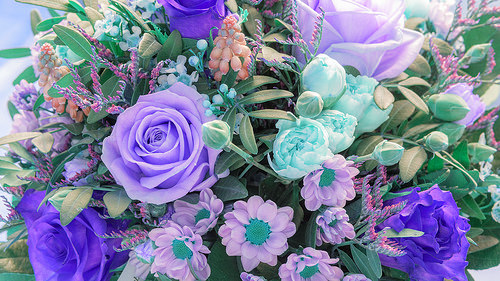

In [ ]:
#opencv will read the image from the disk and will return the 3d numpy array
img = cv2.imread(flower_images_dict['roses'][0])
img

In [ ]:
img.shape

(281, 500, 3)

In [ ]:
#in our data all images have diff dimensions and while training the model we need
#it to be in the same dimensions thus reshape
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y=[],[]
for flower_name,images in flower_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
for flower_name,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(image)
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flower_label_dict[flower_name])

In [ ]:
x=np.array(x)
y=np.array(y)
#it was a list before now its a numpy array

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
#scaling RGB(mostly for all image classificstion)
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
model = Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
       layers.Dense(128,activation='relu'),
       layers.Dense(5,activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=10)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.2802 - loss: 1.6082
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.5464 - loss: 1.0937
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6658 - loss: 0.8983
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.7443 - loss: 0.7031
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.8433 - loss: 0.4398
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9316 - loss: 0.2293
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9503 - loss: 0.1754
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9733 - loss: 0.0972
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9758 - loss: 0.0862
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9915 - loss: 0.0300


In [ ]:
model.evaluate(x_test_scaled,y_test)
#this is the problem on the training data set it had so good accuracy and on the
#test data set it just crashed miserabley

29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 769ms/step - accuracy: 0.6446 - loss: 2.1523


[2.1497344970703125, 0.6427015066146851]

In [ ]:
predictions=np.argmax(model.predict(x_test_scaled))
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 641ms/step


np.int64(86)

In [ ]:
data_augmentation=keras.Sequential([
    layers.RandomZoom(0.9),
])

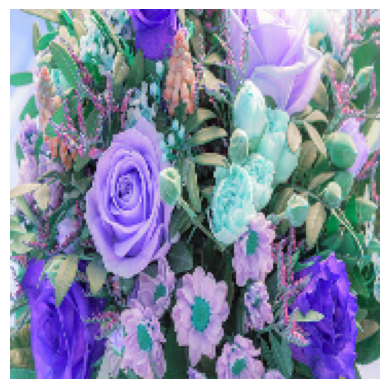

In [ ]:
plt.axis('off')
plt.imshow(x[0])

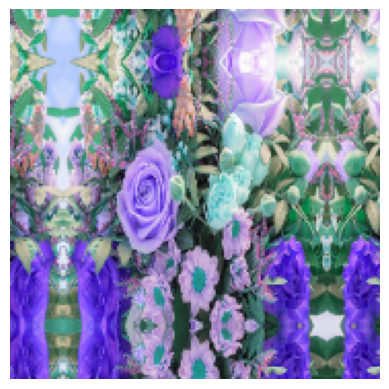

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [ ]:
data_augmentation1=keras.Sequential([
    layers.RandomContrast(0.9),
])

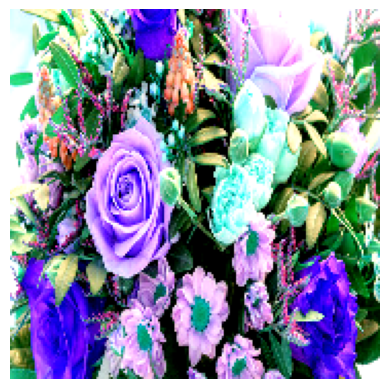

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation1(x)[0].numpy().astype("uint8"))

In [ ]:
data_augmentation2=keras.Sequential([
    layers.RandomRotation(0.9),
])

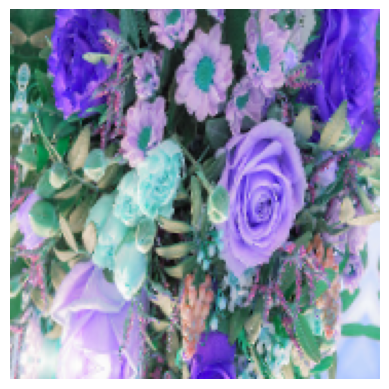

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation2(x)[0].numpy().astype("uint8"))

In [ ]:
data_augmentation_final=keras.Sequential([
    layers.RandomFlip("Horizontal",input_shape=(180,180,3)),
    layers.RandomZoom(0.9),
    layers.RandomRotation(0.9),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
    #so now we are producing diff training sample susing data aug thus better accuracy
    data_augmentation_final,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3),padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
       layers.Dense(128,activation='relu'),
       layers.Dense(5,activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=5)


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.2675 - loss: 1.7851
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.4886 - loss: 1.2375
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.5460 - loss: 1.1591
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.5323 - loss: 1.1380
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.5518 - loss: 1.0695


In [ ]:
model.evaluate(x_test_scaled, y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 780ms/step - accuracy: 0.5274 - loss: 1.2125


[1.1895310878753662, 0.5206971764564514]